# TP1 : quantification, histogramme et égalisation, interpolation, couleur

Dans ce TP, quelques images sont fournies, mais vous êtes fortement encouragés à récupérer et expérimenter sur d'autres images récupérées sur le web.

Les TP de traitement d'images sont réalisés en Python3, à l'aide de la librairie [scikit-image](http://scikit-image.org/docs/stable/). Les tableaux utilisés  (`ndarray`) par cette librairie pour manipuler les images proviennent de la librairie [numpy](https://docs.scipy.org/doc/). L'affichage des images et autres figures est réalisé grace à [matplotlib](https://matplotlib.org/contents.html). La documentation de ces trois librairies vous sera donc bien utile.

Dans ce TP, les questions seront indiquées dans un bloc **question**, et les réponses seront à donner dans le bloc **réponse**  situé en dessous du bloc de question. Vos réponses sont à rédiger en [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). Vous pourrez ainsi répondre non seulement avec du texte, mais aussi avec des tableaux et des images.

Ce TP est à réaliser en deux séances d'1h30.

**Remarque importante:** Les questions posées dans ce TP requièrent généralement des <u>réponses courtes mais justifées</u>. Un simple oui ou non ne nous est d'aucune utilité pour juger de votre compréhension de la question et de sa réponse...

**Autre remarque:** Il y a parfois plusieurs sous-questions dans une même question. <u>Pensez a répondre à toutes les sous-questions</u>.

## Manipulation d'image

- Nous allons commencer par charger et afficher une image à l'aide du code ci-dessous.

In [ ]:
%matplotlib inline
# la ligne précédente permet d'afficher les figures directement dans votre notebook et de pouvoir interagir avec

from skimage import io # on charge le module permettant d'ouvrir des images
import matplotlib.pyplot as plt # gestion des figures

im = io.imread('talvi.jpg')
plt.imshow(im)

- Les images sont manipulées sous forme de tableau à 2 (niveaux de gris) ou 3 dimensions (couleur). Le type python utilisé pour représenter ces tableaux est `ndarray` de la librairie numpy.

In [ ]:
print("type de données utilisé:", type(im))
print("nombre de dimensions de l'image:",im.ndim)
print("dimensions:", im.shape)

**Question 1:** Expliquez les dimensions affichée pour l'image d'exemple.

**Réponse 1:** 400 est l'axe des y, 300 l'axe des x, 3 est la dimension des couleur (RGB)

**Question 2:** Le code suivant transforme l'image d'origine en niveau de gris. Modifiez le afin d'afficher les dimensions de la nouvelle image. Cela correspond-t-il à ce que vous attendez ? Y a-t-il une différence entre les deux méthodes utilisées ? (si oui) pourquoi ?

**Réponse 2:** Les images ont perdu une dimension (celle de la couleur). 

In [ ]:
from skimage import color # fonctions de conversion de couleur


# Traitement des images
im_gris1=im.mean(2)
im_gris2=(color.rgb2gray(im)*255).astype('uint8') #rgb2grey renvoie une image avec 0<= valeurs <=1
diff=abs(im_gris1-im_gris2)

# Affichage sous forme de différentes figures (attention les numéros de figure sont valables dans tout le notebook)
plt.figure(2)
plt.imshow(im_gris1, cmap=plt.cm.gray) # cmap=plt.cm.gray permet d'afficher les image en niveaux de gris avec la bonne palette
plt.title("moyenne")

plt.figure(3)
plt.imshow(im_gris2, cmap=plt.cm.gray)
plt.title("rgb2grey")

plt.figure(4)
print(diff.mean())
plt.imshow(diff, cmap=plt.cm.gray)
plt.title("différence")
print("nombre de dimensions de im_gris1:",im_gris1.ndim)
print("dimensions:", im_gris1.shape)
print("nombre de dimensions de im_gris2:",im_gris2.ndim)
print("dimensions:", im_gris2.shape)

## Quantification

### Comment ça marche ?

Fixer par exemple la variable `Q=8` pour le taux de quantification, puis lancer le script ci-dessous. Essayer pour diverse images (talvi, dégradés, etc.) et déterminer si, à Q identique la visibilité des dégradation dépend des images ou zones d'images.

In [ ]:
import numpy as np # manipulation des ndarray

# Init 
Q=71
im = io.imread('talvi.jpg')

# Traitements 
im_gris=(color.rgb2gray(im)*255).astype('uint8')
im_requantifiee = Q * np.round(im_gris/Q)

# Affichage sous forme de différentes sous figures
plt.figure()  #les numéros de figure ne sont pas obligatoires

plt.subplot(121) # 121 = 1 ligne, 2 colonnes, 1ère sous figure
plt.imshow(im_gris, cmap=plt.cm.gray)
plt.title("image de départ")

plt.subplot(122) # 122 = 1 ligne, 2 colonnes, 2ème sous figure
plt.imshow(im_requantifiee, cmap=plt.cm.gray)
plt.title("requantifié Q=" + str(Q))

**Question 3:** Visualiser l'effet de cette opération pour Q=2, puis Q=38 et Q=71.

**Réponse 3:** la quantification dépend de la zone d'image, la tête du chien change peu suivant la quantification contrairement au décor

**Question 4:** Montrer que cet algorithme réalise de la compression d'images avec perte.

**Réponse 4:** la quantification réduit le nombre de bit nécessaire pour les niveaux de gris, par conséquant l'image est moins lourde, mais la on perd de la qualité

### Comment mesurer la dégradation ?

**Question 5:** Cette dégration visuelle (évaluation subjective de votre part) est-t-elle perceptible pour des quantifications (`Q`) faibles ?

On pourrait qualifier objectivement et numériquement la dégradation par différentes mesures d'erreur (cf. code ci-dessous).

**Réponse 5:** Quand Q est faible on perçoit pas vraiment de changement.

In [6]:
from skimage import metrics # fonctions de mesure d'erreur

err_quad=metrics.mean_squared_error(im_gris, im_requantifiee)
print("erreur quadratique moyenne (mse):", err_quad)
psnr=metrics.peak_signal_noise_ratio(im_gris/255, im_requantifiee/255) # peak_signal_noise_ratio a besoin d'images avec des 0 <= valeur <=1
print("rapport signal bruit (psnr):", psnr)
ssim=metrics.structural_similarity(im_gris/255, im_requantifiee/255) # idem ici
print("similarité structurelle (ssim):", ssim)

erreur quadratique moyenne (mse): 432.21701666666667
rapport signal bruit (psnr): 21.77378499526258
similarité structurelle (ssim): 0.7196451588626623


**Question 6:** Chercher la signification de chacune de ces mesures. De quelle manière doit on les interpréter ? Correspondent elle à votre évaluation subjective ? Est-ce que cette fidélité depend des images / zones d'images ?

**Réponse 6:** Plus Q est petit, plus leur similarité est proche et il y'a peu d'erreurs. La dégradation est visible mais cela oscille en fonction de la zone de l'image.

## Histogramme, seuillage

Le script ci-dessous calcule et affiche l'histogramme des niveaux de gris d'une image, après quantification uniforme en N boites.

** Question 7:** Essayez les trois cas `N=256`, `N=50` et `N=10`. Pour plusieurs images de votre choix, faire le lien entre les régions de l'histogramme et les régions de l'image.

**Réponse 7:** Plus il y'a de zone distincte dans l'image, plus il y'a de pic dans l'image, pour une image avec un oiseau en premier plan et un fond flouté, on obtienne une gaussienne.

(256,)


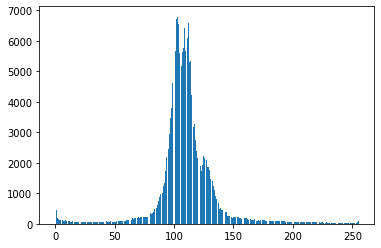

In [7]:
from skimage import exposure


N = 256 # Expérimenter avec d'autres valeurs
im = io.imread('oiseau.jpg') # Expérimenter avec d'autres images
im_gris=(color.rgb2gray(im)*255)

def histo(img):
    (histo, bin_centers)=exposure.histogram(img,N)
    plt.figure()
    print(histo.shape)
    plt.bar(np.arange(N), histo)
histo(im_gris)

** Question 8: ** Que fait le petit script ci-dessous ? Quel est le rôle de la variable `SEUIL` (testez différentes valeurs) ?

**Réponse 8:** il transforme les pixels en noir 0 ou en blanc 255, on obtient une image en noir et blanc. Les valeur des pixels gris en dessous du seuil deviennent noir et ceux au dessus deviennent blanc


** Question 9: ** Quel est le lien ente cette opération de seuillage et l'histogramme de l'image ? A quoi ressemble l'histogramme de l'image seuillée ? (vous pouvez ajouter du code pour l'afficher)

**Réponse 9:** L'histogramme n'a plus que 2 pic: un en 0 et un en 255. Si le seuil est est la valeur moyenne des niveaux de gris alors les pic en 0 et 255 seront égaux.

(256,)


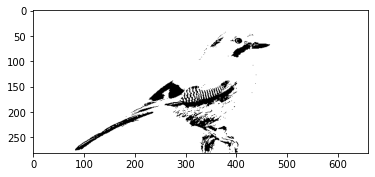

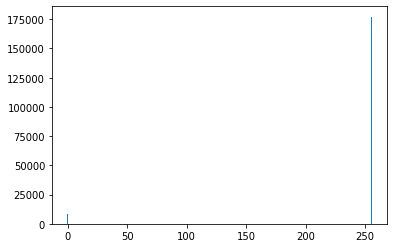

In [8]:
SEUIL = 75

# une double boucle (lente)  pour effectuer notre traitement sur chaque pixel
im_thresholded = np.zeros( im_gris.shape )
largeur = im_gris.shape[1]
hauteur = im_gris.shape[0]

for y in range(0, hauteur):
    for x in range(0, largeur):
        if im_gris[y][x] > SEUIL:
            im_thresholded[y][x] = 255
        else:
            im_thresholded[y][x] = 0

# On peut aussi remplacer la double boucle précédente par ceci
#im_thresholded = (im_gris > SEUIL)*255

plt.figure()
plt.imshow(im_thresholded, cmap=plt.cm.gray)
histo(im_thresholded)

** Question 10: ** Dans une nouvelle cellule de script, adaptez le programme précédent pour réaliser un effet "inverse vidéo" sur l'image originale (un pixel de sortie doit être d'autant plus foncé qu'il n'était clair en entrée).

(256,)


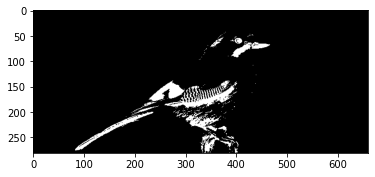

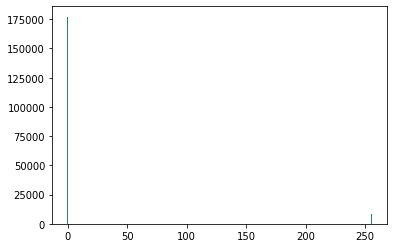

In [9]:
for y in range(0, hauteur):
    for x in range(0, largeur):
        if im_gris[y][x] < SEUIL:
            im_thresholded[y][x] = 255
        else:
            im_thresholded[y][x] = 0

plt.figure()
plt.imshow(im_thresholded, cmap=plt.cm.gray)
histo(im_thresholded)

## Restauration par transformation de l'intensité : égalisation d'histogramme

L'objectif de cette opération est "d'améliorer" une image en transformant son contraste, c'est à dire d'exploiter "au mieux" la dynamique de luminance disponible.

**Question 11:** Exécuter le script ci-dessous et interprétez les résultats pour l'image `essai.jpg`.

**Réponse 11:** En égalisant, on étale la valeur des pixel, ce qui donne lieu à des pixels de valeur 0 ou proche et des pixels de valeur 255 ou proche, ce qui donne une image fort contrasté

<ipython-input-10-3e94a960ff82>:10: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  im_gris=color.rgb2gray(im) # transcodage de l'image en uint8 pour avec un histogramme discret


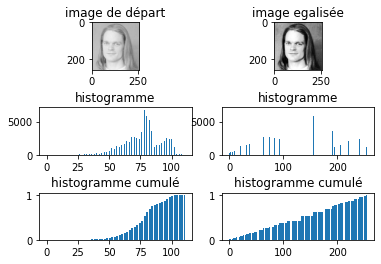

In [10]:
plt.rcParams['figure.subplot.hspace'] = 0.8 # espace un peu les sous-figures verticalement
from skimage import exposure
nb_bins=256


# Egalisation + histogramme
def egalisation(img):
    # Chargement de l'image
    im = io.imread(img) # Expérimenter avec d'autres images
    im_gris=color.rgb2gray(im) # transcodage de l'image en uint8 pour avec un histogramme discret

    # Histogramme normale et cumulé de l'image de départ
    im_gris_histo, im_bins = exposure.histogram( im_gris, nb_bins )
    im_gris_cumul, im_cumul_bins = exposure.cumulative_distribution( im_gris, nb_bins )

    # Egalisation + histogramme
    im_eq = exposure.equalize_hist(im_gris,nb_bins)
    im_eq_histo, im_bins = exposure.histogram( im_eq, nb_bins )
    im_eq_cumul, im_cumul_bins = exposure.cumulative_distribution( im_eq, nb_bins )

    # Affichage
    plt.figure()
    plt.subplot(321)
    plt.imshow(im_gris, cmap=plt.cm.gray)
    plt.title("image de départ")

    plt.subplot(322)
    plt.imshow(im_eq, cmap=plt.cm.gray)
    plt.title("image egalisée")

    plt.subplot(323)
    plt.bar(np.arange(im_gris_histo.size), im_gris_histo)
    plt.title("histogramme")

    plt.subplot(324)
    plt.bar(np.arange(im_eq_histo.size), im_eq_histo)
    plt.title("histogramme")

    plt.subplot(325)
    plt.bar(np.arange(im_gris_cumul.size), im_gris_cumul )
    plt.title("histogramme cumulé")

    plt.subplot(326)
    plt.bar(np.arange(im_eq_cumul.size), im_eq_cumul )
    plt.title("histogramme cumulé")
egalisation("low.png")

**Question 12**: Pourquoi l'histogramme après égalisation n'est il pas tout à fait plat ?

**Réponse 12:** Car il y'a un nombre finis de pixel, par conséquent il y'a "des trou".

**Question 13:** Est-il correct d'affirmer que cette transformation s'écrit sous la forme $I_{sortie}(x,y)=transformation(I_{entree}(x,y))$ ?

**Réponse 13:** Oui et non, la transformation se fait pixel à pixel, mais l'égalisation se fait sur toute l'image.

**Question 15:** La transformation est-elle linéaire ?

**Réponse 15:** Oui car elle s'égalise linéairement sur toute l'image. De plus l'histogramme cumulé forme une droite

**Question 16:** S'adapte-t-elle automatiquement à l'image traitée ?

**Réponse 16:** Oui car elle dépend des pixels

**Question 17:** Selon vous, quels sont les contenus d'images pour lesquels l'égalisation d'histogramme est très (ou très peu) efficace ? Tentez d'en trouver sur le web et de leur appliquer l'algorithme d'égalisation.

**Réponse 17:**  Elle est très peu efficace sur les images à faible résolution. Et très efficace sur les images à haute résolution. De plus elle a plus d'intéret pour les images où les nuances de gris sont proche, autrement dit les images peu constrasté.

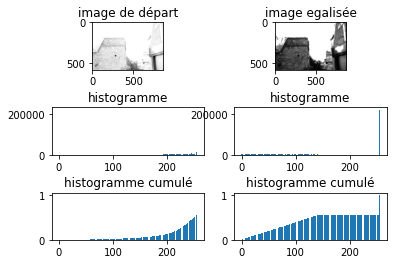

In [11]:
egalisation("clair.jpg")

## Agrandissement d'image

La numérisation des images procède à une discrétisation spatiale, en posant une grille discrète de pixels sur une réalité initialement continue. De nombreuses tâches ont besoin de déterminer l'intensité de l'image en des coordonnées "non entières". Pour estimer cette intensité, on s'appuie souvent sur une hypothèse sur la fonction "luminance": sa continuité, continuité de sa dérivée, etc.

Le script ci-dessous agrandit une image selon deux méthodes : réplication et interpolation bilinéaire.

Text(0.5, 1.0, 'Interpolation bilinéaire')

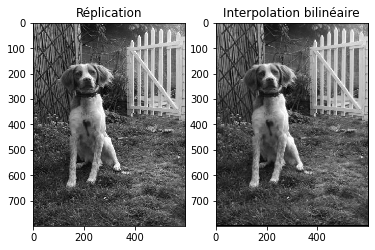

In [12]:
plt.rcParams['image.interpolation'] = 'nearest' # pour ne par faire d'interpolation lors du zoom sur les figures 
# Chargement de l'image
im = io.imread('talvi.jpg') # Expérimenter avec d'autres images
im_gris=color.rgb2gray(im)*255

largeur = im_gris.shape[1]
hauteur = im_gris.shape[0]

# Réplication
im_2x_replic = np.zeros( (hauteur*2,largeur*2) )

for y in range(0, hauteur):
    for x in range(0, largeur):
        xx=2*x
        yy=2*y
        
        im_2x_replic[yy][xx] = im_gris[y][x]
        im_2x_replic[yy][xx+1] = im_gris[y][x]
        im_2x_replic[yy+1][xx] = im_gris[y][x]
        im_2x_replic[yy+1][xx+1] = im_gris[y][x]
        
# Interpolation bilinéaire
im_2x_bilin = np.zeros( (hauteur*2,largeur*2) )

for y in range(0, hauteur-1):
    for x in range(0, largeur-1):
        xx=2*x
        yy=2*y
        
        im_2x_bilin[yy][xx] = im_gris[y][x]
        im_2x_bilin[yy][xx+1] = 0.5*(im_gris[y][x]+im_gris[y][x+1])
        im_2x_bilin[yy+1][xx] = 0.5*(im_gris[y][x]+im_gris[y+1][x])
        im_2x_bilin[yy+1][xx+1] = 0.25*(im_gris[y][x]+im_gris[y][x+1]+im_gris[y+1][x]+im_gris[y+1][x+1])
        
# Affichage
plt.figure()

plt.subplot(121)
plt.imshow(im_2x_replic, cmap=plt.cm.gray)
plt.title("Réplication")

plt.subplot(122)
plt.imshow(im_2x_bilin, cmap=plt.cm.gray)
plt.title("Interpolation bilinéaire")

**Question 18**: Comparez la complexité algorithmique des deux méthodes et leur rendu visuel (zoomez sur des parties bien contrastées de l'image)

**Réponse 18:** La complexité algorithmique est la même O(n²). L'interpolation linéaire donne un résultat plus lisse

**Question 19**: Comment faire une interpolation bilinéaire pour un zoom d'un facteur plus élevé que 2 ? (proposez une modification de l'algorithm initial)

Text(0.5, 1.0, 'Interpolation bilinéaire')

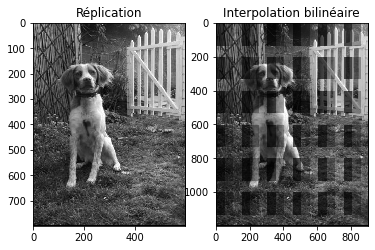

In [25]:
plt.rcParams['image.interpolation'] = 'nearest' # pour ne par faire d'interpolation lors du zoom sur les figures 
# Chargement de l'image
im = io.imread('talvi.jpg') # Expérimenter avec d'autres images
im_gris=color.rgb2gray(im)*255

largeur = im_gris.shape[1]
hauteur = im_gris.shape[0]

# Réplication
im_2x_replic = np.zeros( (hauteur*2,largeur*2) )

for y in range(0, hauteur-1):
    for x in range(0, largeur-1):
        xx=2*x
        yy=2*y
        
        im_2x_replic[yy][xx] = im_gris[y][x]
        im_2x_replic[yy][xx+1] = im_gris[y][x]
        im_2x_replic[yy+1][xx] = im_gris[y][x]
        im_2x_replic[yy+1][xx+1] = im_gris[y][x]
        
# Interpolation bilinéaire
fact = 3
im_2x_bilin = np.zeros( (hauteur*fact,largeur*fact) )


for y in range(0, hauteur-1):
    for x in range(0, largeur-1):
        xx=fact*x
        yy=fact*y
        
        im_2x_bilin[yy][xx] = im_gris[y][x]
        for i in range(1,fact):
            for j in range(1,fact):
                im_2x_bilin[yy][xx+j] = (j/fact)*im_gris[y][x]+(1-(j/fact))*im_gris[y][x+1]
                im_2x_bilin[yy+i][xx] = (i/fact)*im_gris[y][x]+(1-(i/fact))*im_gris[y+1][x]
                im_2x_bilin[yy+i][xx+j] = (1-(i/fact))*(1-(j/fact))*im_gris[y][x]+(i/fact)*(1-(j/fact))*im_gris[y][x+1]
                +(j/fact)*(1-(i/fact))*im_gris[y+1][x]+(i/fact)*(j/fact)*im_gris[y+1][x+1]
# Affichage
plt.figure()

plt.subplot(121)
plt.imshow(im_2x_replic, cmap=plt.cm.gray)
plt.title("Réplication")

plt.subplot(122)
plt.imshow(im_2x_bilin, cmap=plt.cm.gray)
plt.title("Interpolation bilinéaire")

**Question 20**: Comment réduire par 2 les dimensions d'une image ? (proposez et mettez en oeuvre deux méthodes : l'une naive, et l'autre prenant en compte les considérations spectrales vues en traitement du signal)

Text(0.5, 1.0, 'Interpolation bilinéaire')

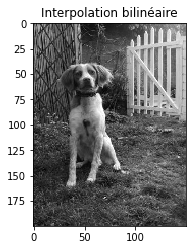

In [23]:
im_2x_bilin = np.zeros( (hauteur//2,largeur//2))

for y in range(0, hauteur-1):
    for x in range(0, largeur-1):
        xx=x//2
        yy=y//2
        
        im_2x_bilin[yy][xx] = im_gris[y][x]


# Affichage
plt.figure()

plt.subplot(122)
plt.imshow(im_2x_bilin, cmap=plt.cm.gray)
plt.title("Interpolation bilinéaire")